In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy
%matplotlib inline

In [2]:
# from calibration_util import *
from calibration_vhos_util import *

# Check vhos calibration method with flipped image

In [3]:
fn = '../data/flipped_images/images_20m_wait_17_ave.fits'

image, nrows, ncols, nsamp, hos_start, vos_start, _ = get_image(fn)
ss_os_slice = slice(hos_start, 3200)
ms_os_slice = slice(ss_os_slice.stop, ncols)
ms_slices = [slice(1000, 1050)]
ss_slices = [slice(0, ms_slices[0].start), slice(ms_slices[0].stop, hos_start)]


In [4]:
v_image = calibrate_image(fn, 'v')
h_image = calibrate_image(fn, 'h', ss_os_slice, ms_os_slice, ss_slices, ms_slices)
vh_image = calibrate_image(fn, 'vh', ss_os_slice, ms_os_slice, ss_slices, ms_slices)

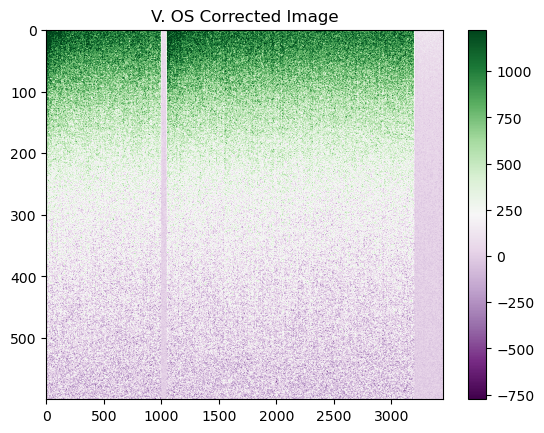

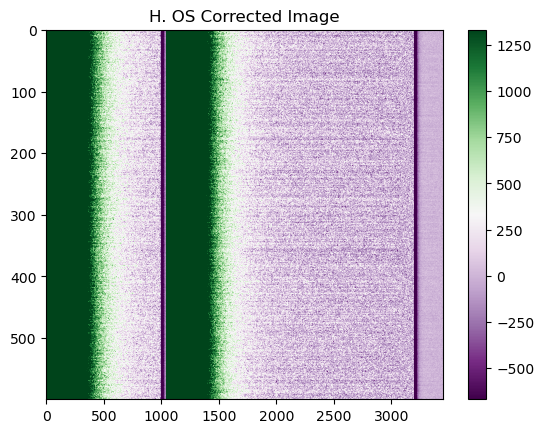

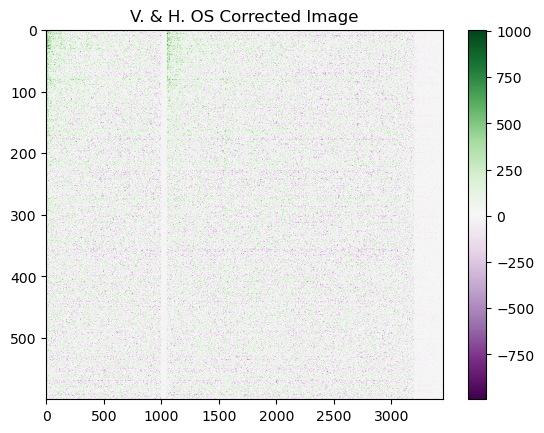

Text(0.5, 0.98, ' V. & H. OS Corrected - Row 400')

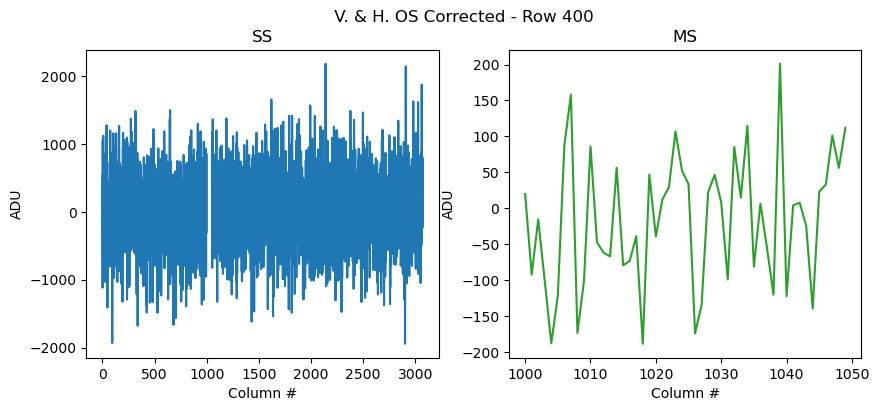

In [5]:
plot_image(v_image[0], 1000, title='V. OS Corrected Image')
plot_image(h_image[0], 1000, title='H. OS Corrected Image')
plot_image(vh_image[0], 1000, title='V. & H. OS Corrected Image')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
i_amp = 0
i_row = 400
axs[0].plot(np.arange(ss_slices[0].start, ss_slices[0].stop), vh_image[i_amp][i_row][ss_slices[0]])
axs[0].plot(np.arange(ss_slices[1].start, ss_slices[1].stop), vh_image[i_amp][i_row][ss_slices[1]], color='C0')
axs[0].set_title('SS')
axs[1].plot(np.arange(ms_slices[0].start, ms_slices[0].stop), vh_image[i_amp][i_row][ms_slices[0]], color='C2')
axs[1].set_title('MS')
for i in range(2):
    axs[i].set_xlabel('Column #')
    axs[i].set_ylabel('ADU')
fig.suptitle(f' V. & H. OS Corrected - Row {i_row}')

# Check vhos calibration method with dark, forward readout image

## Simple image (no ROIs)

In [6]:
import scipy.stats

Text(0.5, 1.0, 'V. & H. OS Corrected. Row 300. i_amp=1')

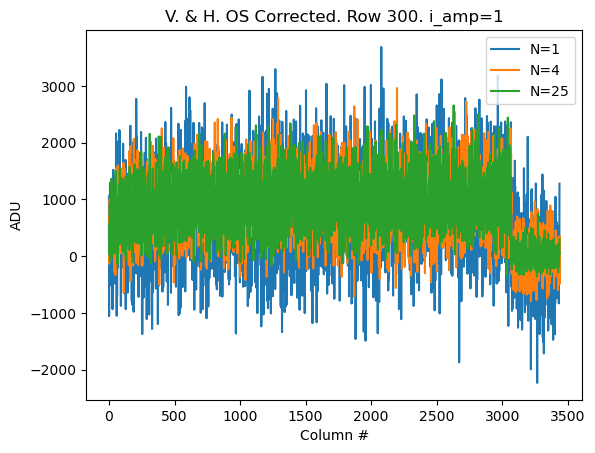

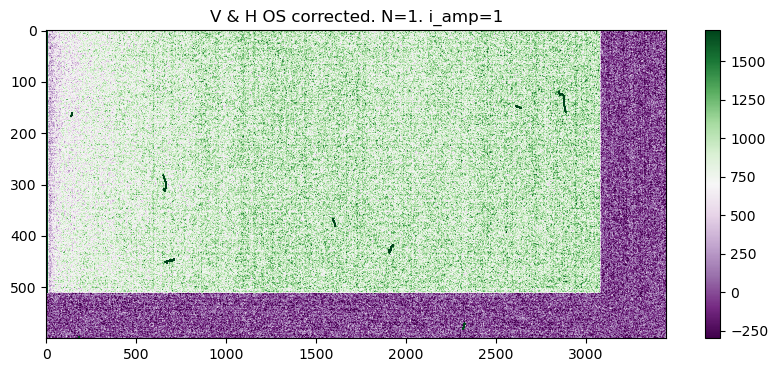

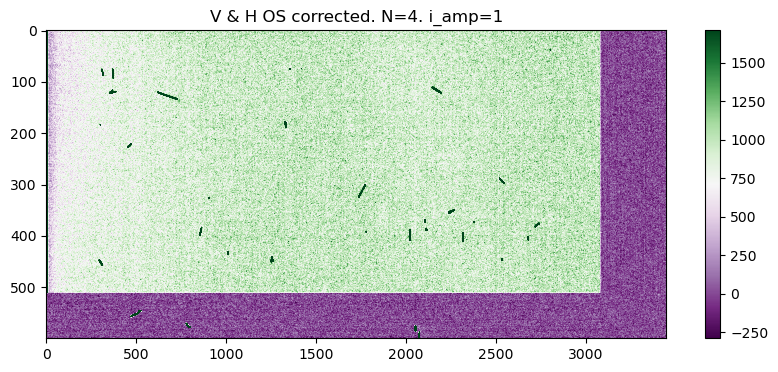

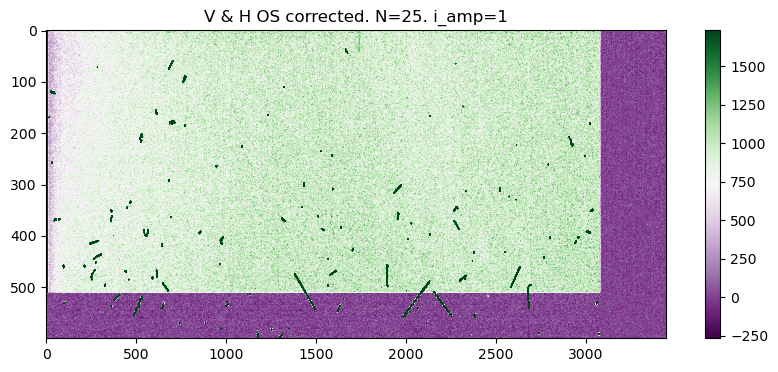

In [7]:
fn1 = '../data/dark_images_090723/image_simple_full_N1_5.fz'
fn4 = '../data/dark_images_090723/image_simple_full_N4_8.fz'
fn25 = '../data/dark_images_090723/image_simple_full_N25_0.fz'

# 0th amplifier loses charge - plot first amplifier
i_amp = 1
i_row = 300
ncol_skip = 10 # remove hotcol from plotting

fig, axs = plt.subplots(1)

for i, (nsamp, fn) in enumerate(zip([1, 4, 25], [fn1, fn4, fn25])):
    image, nrows, ncols, nsamp, hos_start, vos_start, _ = get_image(fn)
    vh_image = calibrate_image(fn, 'vh')
    
    label = f'N={nsamp}'
    axs.plot(scipy.stats.sigmaclip(vh_image[i_amp][i_row][ncol_skip:])[0], label=label)
    
    fig, ax = plt.subplots(1, figsize=(10, 4))
    center = np.median(vh_image[i_amp])
    im = ax.imshow(vh_image[i_amp], aspect='auto', vmax=center+1000, vmin=center-1000, cmap='PRGn')
    ax.set_title(f'V & H OS corrected. N={nsamp}. i_amp={i_amp}')
    fig.colorbar(im, ax=ax)
    
axs.set_xlabel('Column #')
axs.set_ylabel('ADU')
axs.legend()
axs.set_title(f'V. & H. OS Corrected. Row {i_row}. i_amp={i_amp}')

## Dark ROI Image

In [8]:
fn = '../data/dark_images_090723/image_mid_long_N300_2_ave.fits'

image, nrows, ncols, nsamp, hos_start, vos_start, _ = get_image(fn)
ss_os_slice = slice(hos_start, 3200)
ms_os_slice = slice(ss_os_slice.stop, ncols)
ms_slices = [slice(1700, 1900)]
ss_slices = [slice(0, ms_slices[0].start), slice(ms_slices[0].stop, hos_start)]


In [9]:
v_image = calibrate_image(fn, 'v')
h_image = calibrate_image(fn, 'h', ss_os_slice, ms_os_slice, ss_slices, ms_slices)
vh_image = calibrate_image(fn, 'vh', ss_os_slice, ms_os_slice, ss_slices, ms_slices)

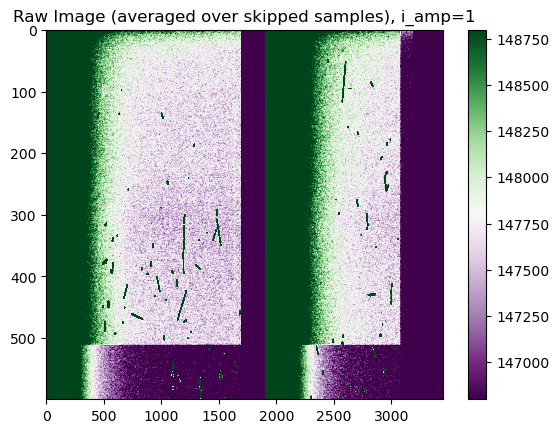

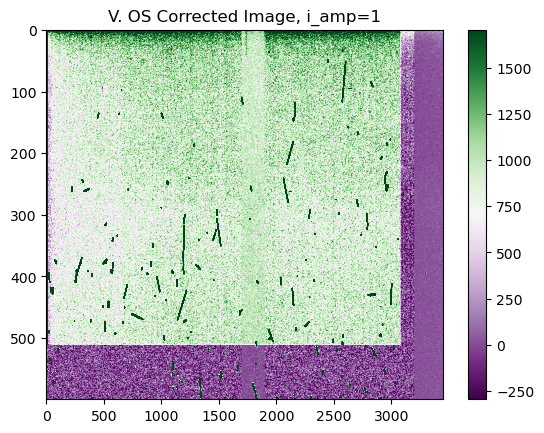

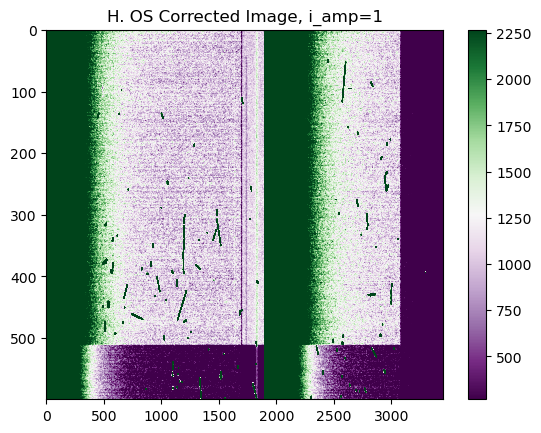

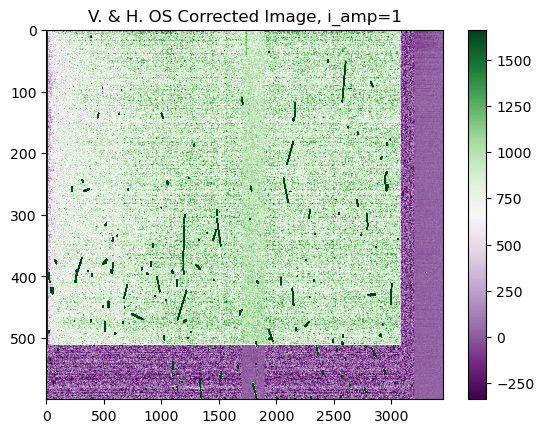

Text(0.5, 0.98, ' V. & H. OS Corrected - Row 400')

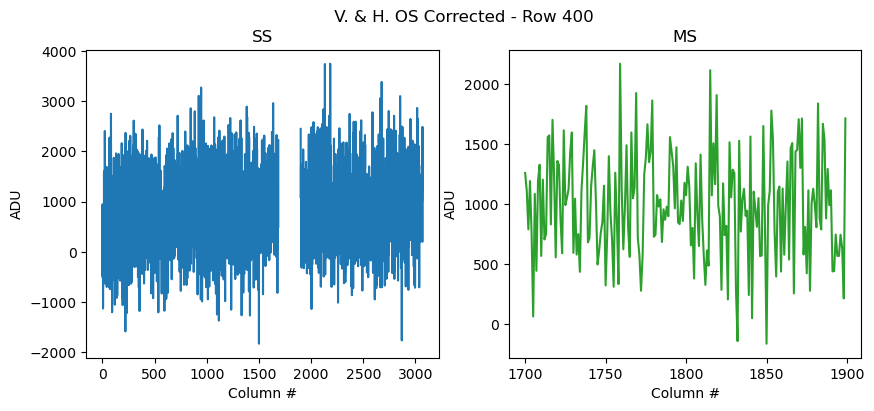

In [10]:
i_amp = 1
i_row = 400

plot_image(image[i_amp], 1000, title=f'Raw Image (averaged over skipped samples), i_amp={i_amp}')
plot_image(v_image[i_amp], 1000, title=f'V. OS Corrected Image, i_amp={i_amp}')
plot_image(h_image[i_amp], 1000, title=f'H. OS Corrected Image, i_amp={i_amp}')
plot_image(vh_image[i_amp], 1000, title=f'V. & H. OS Corrected Image, i_amp={i_amp}')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ys1 = scipy.stats.sigmaclip(vh_image[i_amp][i_row][ss_slices[0]])[0]
ys2 = scipy.stats.sigmaclip(vh_image[i_amp][i_row][ss_slices[1]])[0]
ys3 = scipy.stats.sigmaclip(vh_image[i_amp][i_row][ms_slices[0]])[0]

axs[0].plot(np.arange(ss_slices[0].start, ss_slices[0].stop)[:len(ys1)], ys1)
axs[0].plot(np.arange(ss_slices[1].start, ss_slices[1].stop)[:len(ys2)], ys2, color='C0')
axs[0].set_title('SS')
axs[1].plot(np.arange(ms_slices[0].start, ms_slices[0].stop), ys3, color='C2')
axs[1].set_title('MS')
for i in range(2):
    axs[i].set_xlabel('Column #')
    axs[i].set_ylabel('ADU')
fig.suptitle(f' V. & H. OS Corrected - Row {i_row}')

# Check vhos (horizontal, then vertical) calibration method with exposed image (no ROIs)

In [16]:
fn1 = '../data/exposed_images_092023/image_smart_full_NSAMP_1_smart_exp_t_1_1_ave.fits'
fn2 = '../data/exposed_images_092023/image_smart_full_NSAMP_4_smart_exp_t_1_14_ave.fits'
fn3 = '../data/exposed_images_092023/image_smart_full_NSAMP_25_smart_exp_t_1_24_ave.fits'
i_amp = 1

Text(0.5, 1.0, 'V. & H. OS Corrected. Row 300. i_amp=1')

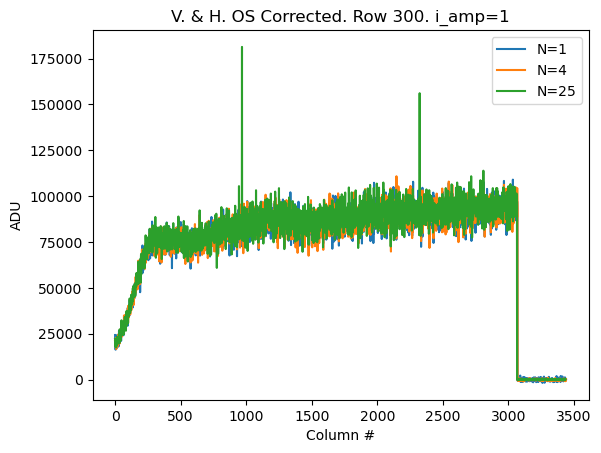

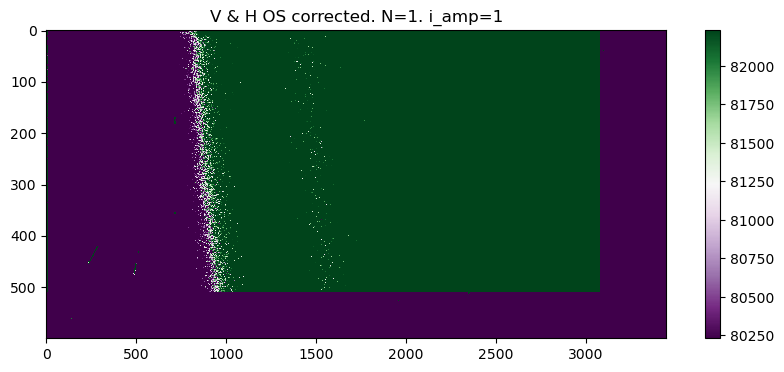

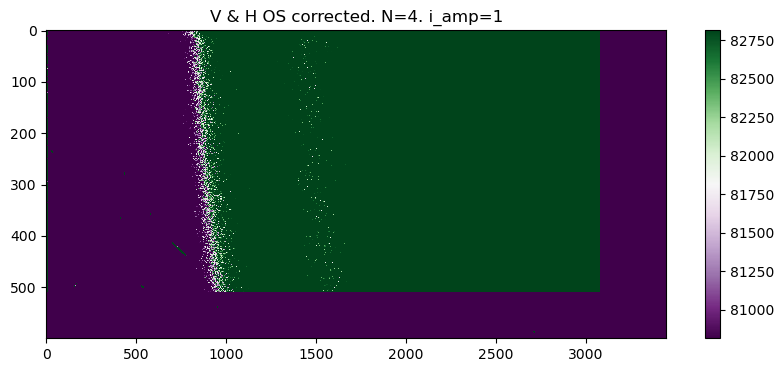

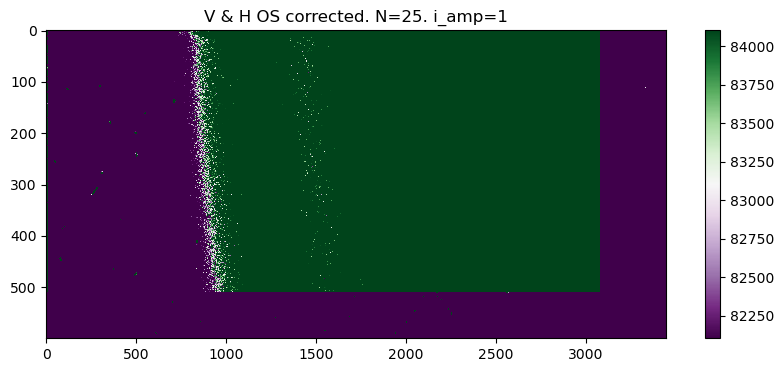

In [22]:
# 0th amplifier loses charge - plot first amplifier
i_amp = 1
i_row = 300
ncol_skip = 10 # remove hotcol from plotting

fig, axs = plt.subplots(1)

for i, (nsamp, fn) in enumerate(zip([1, 4, 25], [fn1, fn2, fn3])):
    image, nrows, ncols, nsamp, hos_start, vos_start, _ = get_image(fn)
    vh_image = calibrate_image(fn, 'vh')
    
    label = f'N={nsamp}'
    axs.plot(scipy.stats.sigmaclip(vh_image[i_amp][i_row][ncol_skip:])[0], label=label)
    
    fig, ax = plt.subplots(1, figsize=(10, 4))
    center = np.median(vh_image[i_amp])
    im = ax.imshow(vh_image[i_amp], aspect='auto', vmax=center+1000, vmin=center-1000, cmap='PRGn')
    ax.set_title(f'V & H OS corrected. N={nsamp}. i_amp={i_amp}')
    fig.colorbar(im, ax=ax)
    
axs.set_xlabel('Column #')
axs.set_ylabel('ADU')
axs.legend()
axs.set_title(f'V. & H. OS Corrected. Row {i_row}. i_amp={i_amp}')